In [1]:
from dataframe import *

<h1> <strong> Example of usage of the statistic module </strong>
</h1>
Please. follow this notebook for various usage:

<h3> The following jupyter cell contain an example of initialization of the class "pyDataFrame"  

   The default constructor is used in this case   
   It contains examples for the mean of variables in a certain period of time
</h3>

Your dataframe contains 15341 rows



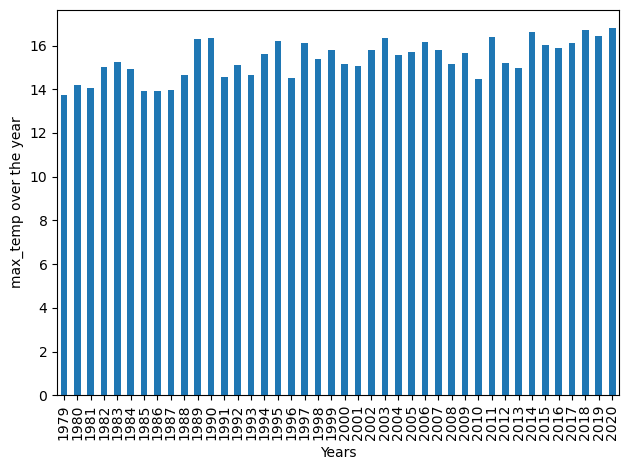

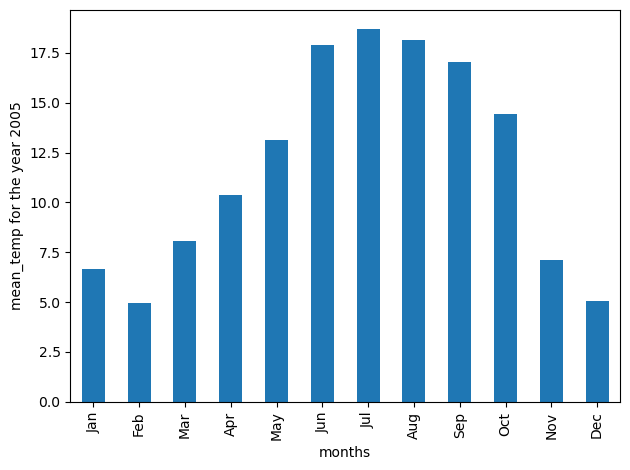

In [2]:
# Creating the object: reading the configuration file:
df=pyDataFrame("configCSV.txt");
# Specify the csv file:
df.read("London_weather.csv",True);

print(f"Your dataframe contains {len(df)} rows\n");
# Convert to date a specific column (default first)
df.convertToDate();

# Perform statistics for all the years:
df.Year_statistics(column="max_temp");
# Perform statistics for a specific year:
df.Month_statistics(column="mean_temp",year="2005");

<h3> Alternatively, the user can use the classmethod as initialization as follows:
    
</h3>


In [12]:
df_I = pyDataFrame.constructFromFile("configCSV.txt","London_weather.csv",True);
df_I.convertToDate();

internal_data = df_I.data;
print(f"First 2 rows of the dataframe with len {len(df_I)} :\n",internal_data[0][:],"\n",internal_data[1][:])

First 2 rows of the dataframe with len 15341 :
 ['19790101', 2.0, 7.0, 52.0, 2.3, -4.1, -7.5, 0.4, 101900.0, 9.0] 
 ['19790102', 6.0, 1.7, 27.0, 1.6, -2.6, -7.5, 0.0, 102530.0, 8.0]


<h3>
    Example of native methods converted from Cpp to python:
</h3>

In [4]:
mean_mean_temp = df_I.mean("mean_temp");
stdev_mean_temp = df_I.stdDev("mean_temp");

print(f"mean temperature statistics: {mean_mean_temp}, {stdev_mean_temp}");

x = df_I["mean_temp"];

mean temperature statistics: 15.388777306814523, 6.554539856764199


<h3> Example of usage of  the (native) iterators by rows and by columns
</h3>

In [ ]:
# Examples of the iterators created in pybind:
# Testing the iterators:

# Iterator:
rowIterator = df.rowIterbegin();
finalIterator = df.rowIterEnd()
while(rowIterator != df.rowIterEnd()-15320):
    colIterator = df.colIterbegin(rowIterator,0);
    currentRow = [];
    while(colIterator != df.colIterEnd(rowIterator,3)):
        currentRow.append(colIterator.getEntry());
        next(colIterator)
    print(f"current row: {currentRow}");
    next(rowIterator)



<h3> Test the linear regression implemented in the dataframe and the linear regression of sklearn: 
</h3>
 Below, you can find a snippet of code that compares the result of the scikit implementation for the linear regression
 and my Linear regression (single column native implementation)

In [ ]:
Linear_model = LinearRegression();

X, y = df.data_['global_radiation'].values.reshape(-1,1), df.data_['mean_temp'].values.reshape(-1,1);

# Skip the missing values:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean');
imputer = imputer.fit(X);
X_imputed = imputer.transform(X);

imputerY = SimpleImputer(missing_values=np.nan, strategy='mean');
imputerY = imputerY.fit(y);
Y_imputed = imputerY.transform(y);

res = Linear_model.fit(X_imputed, Y_imputed);

y_pred = Linear_model.predict(X_imputed);
figure,ax = plt.subplots(1,1,figsize=(5,5));
ax.scatter(X,y,marker='x');
ax.plot(X_imputed,y_pred,color='r',linewidth=4,label='Scikit implementation');


#Linear regression in C++:
w,I = df.LinRegDD(4,6);
myPrediction = w*X_imputed+I;

ax.plot(X_imputed,myPrediction,color='g',linewidth=3,label='Native implementation');
ax.set_xlabel('Mean-temperature');
ax.set_ylabel('Global radiation');
ax.legend();
plt.show();

<h3> Multiple linear regression usage example:
</h3>

The following cell shows how to perform multiple linear regression of the type   
$$ y = w_1 x_1 + w_2 x_2 + I $$ 
with $x_1$ the mean temperature, $x_2$ the max temperature and $y$ is the global radiation

In [ ]:
# The function takes as arguments a list for the x-values and a string for the y values:
coef = df.LinearRegression(["mean_temp","max_temp"],"global_radiation")
# It returns the slopes and the Intercept:
coef

<h3> Example usage of writing the operation in a file specified by the user:
</h3>
The various operations after the function "df.write()" are redirected to the output file

In [ ]:
df.SetOutputFile("outputfile.txt");


df.write(separator=" ");
#As previously, various operations
#in C++ are redirected in the "output_file.txt"
df.mean("mean_temp");
df.stdDev("mean_temp");

#write a numpy vector in the file:
vec = [0.5,0.3,0.2,0.1];
vec = np.array(vec);
df.writeEntry("vectorFloat",vec);

df.closeOutput();

<h3> Example usage of the class "pyCSVwriter".
</h3>

In [ ]:
writer = dfb.pyCSVwriter("output_file.txt",",");
writer.write();
#With the function "writeToFile" the user can redirect the ouput in the file:
writer.writeToFile(35);
writer.endrow();
#Native array:
writer.writeToFile([0.5,0.2,0.3]);
writer.endrow();
#Numpy array:
writer.writeToFile(np.array([0.5,0.2,0.3]));
writer.close();